In [2]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,f1_score

import numpy as np
from random import seed
from random import randrange
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
%matplotlib inline

## Exploratory Data Analysis 

In [4]:
  
def randomGuessing(train_X, train_y,val_X):
    output_values = train_y.copy()
    unique_labels = list(set(output_values))
    print(unique_labels)
    predictions = []
    for row in val_X:
        index = randrange(len(unique_labels))
        predictions.append(unique_labels[index])
    return predictions

def zeroRuleGuessing(train_X, train_y,val_X):
    output_values = train_y.copy()
    output_values=list(output_values)
    prediction = max(set(output_values), key=output_values.count)
    predictions = [prediction for i in range(len(val_X))]
    return predictions

def loadMushroomData(filename):    
    '''    
    train.csv:
    Column 1: Prediction label  
    '''    
    df = pd.read_csv(filename).values # Load the data
    X, y = df[:, 1:], df[:,0] # separate target from pixels
    
    return X, y 

def getLowContribColumns(df):
    cols=[]
    for col in df.columns.values:
#        print(col, df[col].unique())
        if(len(df[col].unique())==1):
            cols.append(col)        
    return cols    

In [5]:
df = pd.read_csv('./Datasets/q2/train.csv')    
rows,cols=df.shape    
df.columns = ['edible',
'cap-shape',              
'cap-surface',            
'cap-color',              
'bruises',               
'odor',                   
'gill-attachment',        
'gill-spacing',           
'gill-size',              
'gill-color',             
'stalk-shape',            
'stalk-root',             
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring', 
'stalk-color-below-ring', 
'veil-type',              
'veil-color',             
'ring-number',            
'ring-type',              
'spore-print-color',      
'population',             
'habitat'] 

Drop columns that do not have any contribution

In [6]:
drop_cols=getLowContribColumns(df)

for col in drop_cols:
    print('Dropping low contrib column:',col)
    df.drop(col, axis=1, inplace=True)


Dropping low contrib column: veil-type


Replace missing values 

In [7]:
df.replace(to_replace ="?", value = None)
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)   

Observe the distribution of training data labels

Unequal Distribution
p    64.29366
e    35.70634
Name: edible, dtype: float64


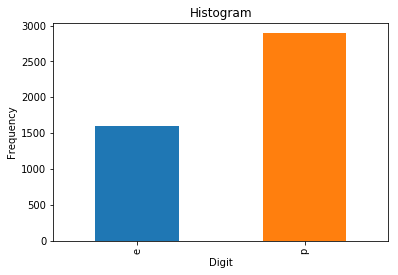

In [8]:

df_label=df['edible'].value_counts()

df_label.replace(to_replace ="e", value = 'Edible', inplace=True)
df_label.replace(to_replace ="p", value = 'Poisonous', inplace=True)

# with pandas
df_label=df_label.sort_index()
df_label.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Digit')
plt.title('Histogram')


print('Unequal Distribution')
print(df.edible.value_counts(normalize=True)*100.0)


Baseline performance using a dumb model is correct ~60% of time in this case . This is matching with roughly same number of dominant class labels provided in the training dataset.

In [9]:
seed(2489)

X,y=loadMushroomData('./Datasets/q2/train.csv')

(train_X, val_X, train_y, val_y) = train_test_split(X,y, test_size=0.25, random_state=42)

pred_labels = randomGuessing(train_X, train_y,val_X)
print('\n Accuracy using Random guessing')
print(accuracy_score(val_y, pred_labels)*100.0)

pred_labels =zeroRuleGuessing(train_X, train_y,val_X)
print('\n Accuracy using Zero Rule Guessing')
print(accuracy_score(val_y, pred_labels)*100.0)


['p', 'e']

 Accuracy using Random guessing
50.0889679715

 Accuracy using Zero Rule Guessing
61.9217081851


KNN using Sklearn 

In [10]:
print(df.head())

  edible cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      e         k           s         g       f    n               f   
1      e         b           s         g       f    n               f   
2      e         s           f         g       f    n               f   
3      e         f           f         g       f    n               f   
4      e         x           s         n       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-above-ring  \
0            w         b          p   ...                          s   
1            w         b          w   ...                          s   
2            c         n          n   ...                          s   
3            w         b          p   ...                          s   
4            w         b          h   ...                          s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w   

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 22 columns):
edible                      4495 non-null object
cap-shape                   4495 non-null object
cap-surface                 4495 non-null object
cap-color                   4495 non-null object
bruises                     4495 non-null object
odor                        4495 non-null object
gill-attachment             4495 non-null object
gill-spacing                4495 non-null object
gill-size                   4495 non-null object
gill-color                  4495 non-null object
stalk-shape                 4495 non-null object
stalk-root                  4495 non-null object
stalk-surface-above-ring    4495 non-null object
stalk-surface-below-ring    4495 non-null object
stalk-color-above-ring      4495 non-null object
stalk-color-below-ring      4495 non-null object
veil-color                  4495 non-null object
ring-number                 4495 non-null object
ring-type  

In [15]:
print('Output labels')
print(df["edible"].unique())

Output labels
['e' 'p']


In [22]:
cols=[]
for col in df.columns.values:
	if(len(df[col].unique())==1):
		cols.append(col)  

print('Cleaning the data')

for col in cols:
	print('Dropping low contribution column:',col)
	df.drop(col, axis=1, inplace=True)        

print('After dropping low contribution columns') 
print(df.head()) 

df.replace(to_replace ="?", value = None)
for column in df.columns:
	df[column].fillna(df[column].mode()[0], inplace=True)
		
print('After replacing missing values') 
print(df.head())  

X=df.drop('edible',axis=1) #Predictors
y=df['edible'] #Response

Encoder_X = LabelEncoder() 
for col in X.columns:
	X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
 
X=X.values

#using min-max normalization
X=(X-X.min())/(X.max()-X.min())

print(X)
print(y)

Cleaning the data
After dropping low contribution columns
  edible cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      e         k           s         g       f    n               f   
1      e         b           s         g       f    n               f   
2      e         s           f         g       f    n               f   
3      e         f           f         g       f    n               f   
4      e         x           s         n       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-above-ring  \
0            w         b          p   ...                          s   
1            w         b          w   ...                          s   
2            c         n          n   ...                          s   
3            w         b          p   ...                          s   
4            w         b          h   ...                          s   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ri

In [23]:
#Splitting the given data into train and validation set in 75:25 split
(X_train, X_val, y_train, y_val) = train_test_split(X,  y, test_size=0.25, random_state=42)

In [24]:
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    if knn.score(X_val,y_val) > best_score:
        best_score = knn.score(X_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


KNN impelementation from scratch

In [ ]:
k_list=[3,5,7,9,11,13,15]

k_list=[3]
from q2 import KNNClassifier as knc
knn_classifier = knc()
knn_classifier.train('./Datasets/q2/train.csv')

In [27]:
knn_classifier.evaluate(k_list)
knn_classifier.getEvaluationMetrics()


In [28]:
predictions = knn_classifier.predict2('./Datasets/q2/test.csv',3)

   x  y  n  t n.1  f  c  b  w t.1 ... s.1 w.1 w.2  p w.3  o p.1 n.2 y.1  d
0  b  y  y  t   l  f  c  b  n   e ...   s   w   w  p   w  o   p   k   n  g
1  f  y  g  t   n  f  c  b  n   t ...   s   g   p  p   w  o   p   n   y  d
2  f  s  g  f   n  f  w  b  n   t ...   f   w   w  p   w  o   e   k   s  g
3  x  s  y  t   l  f  c  b  g   e ...   s   w   w  p   w  o   p   n   n  g
4  f  y  g  t   n  f  c  b  w   t ...   s   p   w  p   w  o   p   k   v  d

[5 rows x 22 columns]


In [ ]:
print('Number of test labels')
test_labels = pd.read_csv(r'Datasets/q2/test_labels.csv').values 
print(len(test_labels))
print (accuracy_score(test_labels, predictions)*100.0)

In [ ]:
Num of Clusters: 3

Confusion matrix:
[[428   0]
 [  0 696]]

Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       428
          1       1.00      1.00      1.00       696

avg / total       1.00      1.00      1.00      1124